In [45]:
import time
import imageio
import os
import sys
import tarfile
import pickle

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
tf.__version__

'1.8.0'

In [7]:
DATAPATH = '/Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/'

In [14]:
num_classes = 10

In [16]:
#extract the tar.gz files

train_filename = DATAPATH + 'notMNIST_large.tar.gz'
test_filename = DATAPATH + 'notMNIST_small.tar.gz'

def maybe_extract(filename):
    root_file = os.path.splitext(os.path.splitext(filename)[0])[0]
    if os.path.isdir(root_file):
        print('{} already extracted'.format(filename))
    else:
        print('{} extracting the data'.format(filename))
        tar = tarfile.open(filename)
        tar.extractall(DATAPATH)
        tar.close()
    data_folders = [os.path.join(root_file,d) for d in sorted(os.listdir(root_file))]
    return data_folders

train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

/Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large.tar.gz extracting the data
/Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small.tar.gz extracting the data


In [26]:
#just displaying some images

from IPython.display import Image

for folder in train_folders:
    for ids, fname in enumerate(os.listdir(folder)):
        print('train folder info {}'.format(folder))
        display(Image(os.path.join(folder, fname)))
        break

for folder in test_folders:
    for ids, fname in enumerate(os.listdir(folder)):
        print('test folder info {}'.format(folder))
        display(Image(os.path.join(folder, fname)))
        break

train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/B


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/C


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/D


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/E


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/F


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/G


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/H


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/I


train folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/J


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/A


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/B


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/C


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/D


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/E


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/F


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/G


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/H


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/I


test folder info /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_small/J


In [37]:
#load the images into a more manageable format and store them in a more friendly readable format
image_size = 28
pixel_depth = 255.0

def load_letter(folder, min_num_images):
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
    print('folder name:-', folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (imageio.imread(image_file).astype(float) - pixel_depth/2)/pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except (IOError, ValueError) as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images, min_num_images))
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset   

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                print(dataset.shape)
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('unable to save data {}'.format(set_filename))
    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A.pickle.
folder name:- /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A
Could not read: /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.12825024
Standard deviation: 0.44312063
(52909, 28, 28)
Pickling /Users/srikanth_m07/Documents/ml_dataset/vision/notMNIST/notMNIST_large/B.p

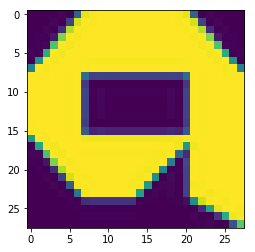

In [48]:
#lets verify the formated data
%matplotlib inline
for fol in train_datasets:
    images = pickle.load(open(fol, 'rb'))
    plt.imshow(images[0,:, :])
    break

In [51]:
#check whether data is balanced or not
for fol in train_datasets:
    print(np.shape(pickle.load(open(fol, 'rb'))))
    
for fol in test_datasets:
    print(np.shape(pickle.load(open(fol, 'rb'))))

(52909, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52911, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52912, 28, 28)
(52911, 28, 28)
(1872, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1873, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)
(1872, 28, 28)


In [52]:
#create train, valid and test datasets
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [53]:
#randomize dataset
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [54]:
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [55]:
#not mnist pickle
pickle_file = os.path.join(DATAPATH, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [56]:
train_dataset.flags.writeable = False
valid_dataset.flags.writeable = False
test_dataset.flags.writeable = False

train_hash = [hash(e.tobytes()) for e in train_dataset]
valid_hash = [hash(e.tobytes()) for e in valid_dataset]
test_hash = [hash(e.tobytes()) for e in test_dataset]

unique_train_hash = set(train_hash)
valid_overlap = unique_train_hash.intersection(set(valid_hash))
test_overlap = unique_train_hash.intersection(set(test_hash))

print('Duplicates inside training set: ', len(train_hash) - len(unique_train_hash))
print('Duplicates between training and validation: ', len(valid_overlap))
print('Duplicates between training and test: ', len(test_overlap))

Duplicates inside training set:  12530
Duplicates between training and validation:  916
Duplicates between training and test:  1190


In [ ]:
#train the model
